# 0. Code profesor



In [1]:
import requests
from bs4 import BeautifulSoup

from collections import Counter

In [2]:
def get_ngrams(text: str, n: int, pad=False) -> list:
  extra = n - 1
  if pad:
    text = f"{'-' * (n - 1)}{text}{'-' * extra}"
  return [text[i:i + n] for i in range(len(text) - extra)]

In [3]:
def get_declaration(lang: str) -> str:
  url = (
      f"https://www.un.org/{lang}/"
      "universal-declaration-human-rights/index.html"
  )
  r = requests.get(url)
  r.encoding = "utf-8"
  html = r.text
  r.close()
  soup = BeautifulSoup(html)
  declaracion = soup.find_all("div", class_="col-md-12")[1]
  return declaracion.text

In [4]:
def join_feats(feat_dict: dict) -> Counter:
  total = Counter()
  for v in feat_dict.values():
    total += Counter(v)
  return total

In [5]:
dec_es = get_declaration("es")
dec_en = get_declaration("en")
dec_fr = get_declaration("fr")

In [6]:
es_feat = {f"{n}": get_ngrams(dec_es, n) for n in range(1, 4)}
en_feat = {f"{n}": get_ngrams(dec_en, n) for n in range(1, 4)}
fr_feat = {f"{n}": get_ngrams(dec_fr, n) for n in range(1, 4)}

In [7]:
total_es = join_feats(es_feat)
total_en = join_feats(en_feat)
total_fr = join_feats(fr_feat)

In [10]:
common_es = total_es.most_common(30)
common_en = total_en.most_common(30)
common_fr = total_fr.most_common(30)

In [9]:
print(len(total_es.keys()))
print(len(total_en.keys()))
print(len(total_fr.keys()))

2301
2486
2393


# 1. Comparación de gráficas de los idiomas 

## 1.1 Visualizar de manera general nuestros datos de análsis

In [12]:
print(common_es)
type(common_en)

[(' ', 1969), ('e', 1267), ('a', 1026), ('o', 821), ('i', 726), ('n', 692), ('s', 665), ('r', 653), ('d', 592), ('l', 524), ('c', 504), ('t', 441), ('a ', 339), ('u', 319), ('e ', 296), ('de', 276), (' d', 266), ('s ', 256), (' de', 241), ('o ', 237), ('p', 236), ('en', 222), ('er', 220), ('m', 208), (' l', 188), (' e', 173), ('ci', 169), ('n ', 165), (' p', 164), ('es', 164)]


list

## 1.2  Graficación de los  n-gramas más comúnes 

Importamos bibliotecas necesarias

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

Cambiamos los datos a dataframes para un mejor uso

In [87]:
df_EN = pd.DataFrame(common_en, columns = ['n-gram', 'cantEN'])
df_ES = pd.DataFrame(common_es, columns = ['n-gram', 'cantES'])
df_FR = pd.DataFrame(common_fr, columns = ['n-gram', 'cantFR'])
print(df_ES.head(10))
print(df_EN.head(10))

  n-gram  cantES
0           1969
1      e    1267
2      a    1026
3      o     821
4      i     726
5      n     692
6      s     665
7      r     653
8      d     592
9      l     524
  n-gram  cantEN
0           1684
1      e    1037
2      t     788
3      o     702
4      n     691
5      i     689
6      a     661
7      r     602
8      s     453
9      h     440


Text(0, 0.5, 'Cantidad')

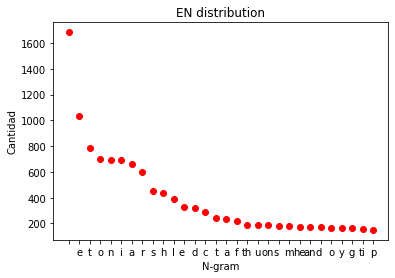

In [68]:
plt.title('EN distribution')
plt.plot(df_EN[:][0],df_EN[:][1],'ro')
plt.xlabel('N-gram')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

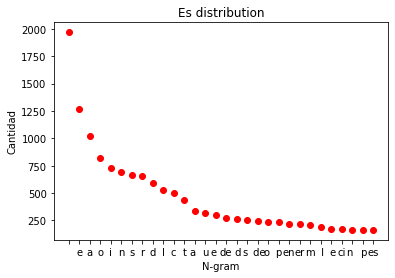

In [67]:
plt.title('Es distribution')
plt.plot(df_ES[:][0],df_ES[:][1],'ro')
plt.xlabel('N-gram')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

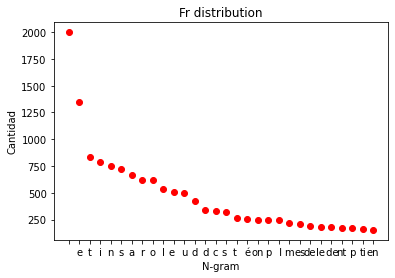

In [69]:
plt.title('Fr distribution')
plt.plot(df_FR[:][0],df_FR[:][1],'ro')
plt.xlabel('N-gram')
plt.ylabel('Cantidad')

# 2. Corrrelaciones de Pearson 

### 2.1 Join dataframes on a mega dataframe

In [101]:
mergeFrame = df_ES
#mergeFrame.join(df_FR, how='outer', on='n-gram')
mergeFrame = pd.merge_ordered(df_ES, df_EN, fill_method="ffill", left_by="n-gram")
mergeFrame = pd.merge_ordered(mergeFrame, df_FR, fill_method="ffill", left_by="n-gram")
mergeFrame

,n-gram,cantES,cantEN,cantFR
0,,1969,1684.0,1999.0
1,e,1267,1037.0,1343.0
2,a,1026,661.0,668.0
3,o,821,702.0,616.0
4,i,726,689.0,784.0
5,n,692,691.0,747.0
6,s,665,453.0,722.0
7,r,653,602.0,623.0
8,d,592,317.0,426.0
9,l,524,392.0,535.0


### 2.2 Pearson correlations

**NOTA:**  ¿Cómo sacamos el valorde la correlación con tantos datos sesgados?

Correlación entre Español e Inglés

In [102]:
mergeFrame['cantES'].corr(mergeFrame['cantEN'])

0.9324161169596489

Correlación entre Español y Francés

In [104]:
mergeFrame['cantES'].corr(mergeFrame['cantFR'])

0.9383593196690967

Correlación entre Inglés y Francés

In [105]:
mergeFrame['cantEN'].corr(mergeFrame['cantFR'])

0.964720002860171

### 2.3 Graph  Correlations

NOTA: Debido a que tenemos segmentos sin datos por ello tenemos comportamiento anomalos como el mostrado al inicio de la gráfica

Text(0, 0.5, 'cantFR')

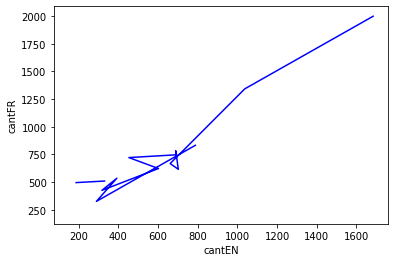

In [106]:
plt.plot(mergeFrame['cantEN'],mergeFrame['cantFR'],'blue')
plt.xlabel('cantEN')
plt.ylabel('cantFR')

# 3 General Graph 

Text(0, 0.5, 'Cantidad')

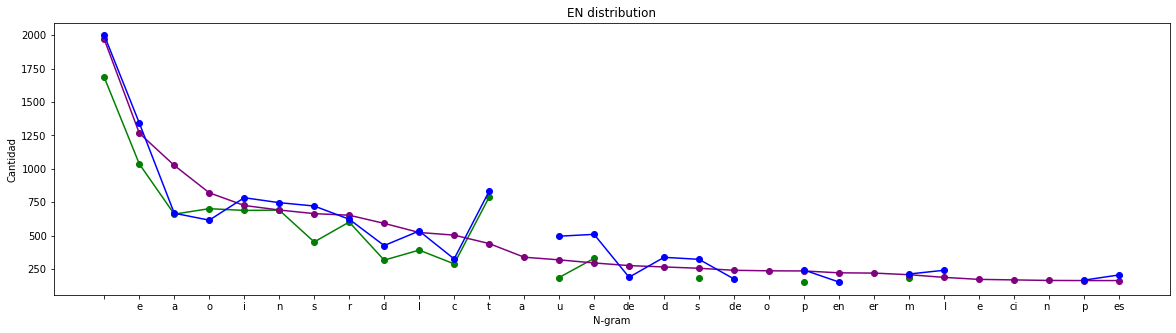

In [112]:
plt.figure(figsize=(20, 5))
plt.title('EN distribution')
plt.plot(mergeFrame['n-gram'], mergeFrame['cantEN'], color='green', marker='o', label='EN')
plt.plot(mergeFrame['n-gram'], mergeFrame['cantES'], color='purple', marker='o', label='ES')
plt.plot(mergeFrame['n-gram'], mergeFrame['cantFR'], color='blue', marker='o', label='FR')
plt.xlabel('N-gram')
plt.ylabel('Cantidad')

En esta gráfica podemos ver algo bastante implicito que es el que se parecen mucho estos idiomas debido a la raíz de la que vienen, en el caso del español y francés el origen romance